In [1]:
import numpy as np

def random_symmetric_array(n):
    """
    Generate a symmetric n x n array of random values between 0 and 1
    with 0's on the diagonal
    """
    # Generate a matrix of random values
    init_matrix = np.random.rand(n, n)
    
    # Zero out the lower part of upper_triangle
    upper_triangle = np.triu(init_matrix,k=1)
    
    # Make it symmetric by copying upper triangle to lower triangle
    symmetric_array = upper_triangle + upper_triangle.T
    
    return symmetric_array

# Example usage:
n = 10  # Size of the array
random_matrix = random_symmetric_array(n)
print(random_matrix)


[[0.         0.83540402 0.5819889  0.08149602 0.90702601 0.05222817
  0.28152289 0.27072765 0.43962449 0.49142154]
 [0.83540402 0.         0.69152333 0.69412443 0.11205473 0.99369275
  0.73111668 0.37296819 0.93265811 0.62725098]
 [0.5819889  0.69152333 0.         0.319124   0.74835358 0.79631187
  0.72061811 0.47080014 0.62067052 0.86870225]
 [0.08149602 0.69412443 0.319124   0.         0.40500601 0.98473497
  0.17481811 0.02553676 0.41711318 0.25825204]
 [0.90702601 0.11205473 0.74835358 0.40500601 0.         0.49199764
  0.03555546 0.57380792 0.55051707 0.78981577]
 [0.05222817 0.99369275 0.79631187 0.98473497 0.49199764 0.
  0.63644664 0.10742864 0.44090411 0.8095113 ]
 [0.28152289 0.73111668 0.72061811 0.17481811 0.03555546 0.63644664
  0.         0.25189758 0.09329077 0.91893219]
 [0.27072765 0.37296819 0.47080014 0.02553676 0.57380792 0.10742864
  0.25189758 0.         0.21756    0.17594541]
 [0.43962449 0.93265811 0.62067052 0.41711318 0.55051707 0.44090411
  0.09329077 0.21756

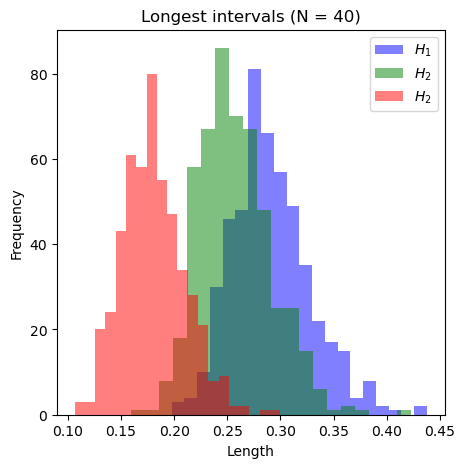

In [4]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt

N = 40 # number of vertices
K = 500 # trials

# Compute homology intervals and store lengths
one_dim_lengths = []
two_dim_lengths = []
three_dim_lengths = []

for _ in range(K):
    # Generate random symmetric matrix
    graph = random_symmetric_array(N)
    
    # Compute persistent homology
    result = ripser(graph, distance_matrix=True, maxdim=3)
    
    # Access homology intervals
    one_dim_intervals = result['dgms'][1]   # 1-dimensional homology intervals
    two_dim_intervals = result['dgms'][2]   # 2-dimensional homology intervals
    three_dim_intervals = result['dgms'][3] # 3-dim
    
    # Compute lengths of longest intervals
    one_dim_lengths.append(max(interval[1] - interval[0] for interval in one_dim_intervals))
    two_dim_lengths.append(max(interval[1] - interval[0] for interval in two_dim_intervals))
    three_dim_lengths.append(max(interval[1] - interval[0] for interval in three_dim_intervals))

# Plot histograms
plt.figure(figsize=(5,5))

plt.hist(one_dim_lengths, bins=20, color='blue', alpha=0.5, label='$H_1$')

plt.hist(two_dim_lengths, bins=20, color='green', alpha=0.5, label='$H_2$')

plt.hist(three_dim_lengths, bins=20, color='red', alpha=0.5, label='$H_2$')


plt.title(f'Longest intervals (N = {N})')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

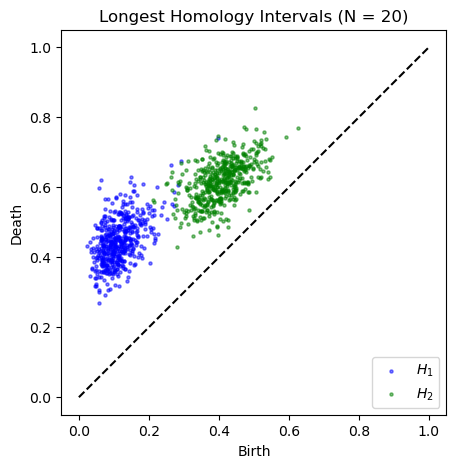

In [88]:
# Parameters
N = 20  # Size of the array
K = 500  # Number of times to generate matrices

# Compute homology intervals and store lengths
one_dim_longest_intervals = []
two_dim_longest_intervals = []

for _ in range(K):
    # Generate random symmetric matrix
    matrix = random_symmetric_array(N)
    
    # Compute persistent homology
    result = ripser(matrix, distance_matrix=True, maxdim=2)
    
    # Access homology intervals
    one_dim_intervals = result['dgms'][1]   # 1-dimensional homology intervals
    two_dim_intervals = result['dgms'][2]   # 2-dimensional homology intervals
    
    # Find the longest 1-dimensional interval
    longest_interval_1d = max(one_dim_intervals, key=lambda x: x[1] - x[0])
    one_dim_longest_intervals.append(longest_interval_1d)
    
    # Find the longest 2-dimensional interval
    longest_interval_2d = max(two_dim_intervals, key=lambda x: x[1] - x[0])
    two_dim_longest_intervals.append(longest_interval_2d)

# Plot scatter plots of (birth, death) coordinates for longest intervals
plt.figure(figsize=(12, 5))

# Plot 1-dimensional intervals
one_dim_births = [interval[0] for interval in one_dim_longest_intervals]
one_dim_deaths = [interval[1] for interval in one_dim_longest_intervals]
plt.scatter(one_dim_births, one_dim_deaths, color='blue', alpha=0.5, label='$H_1$', s=5)

# Plot 2-dimensional intervals
two_dim_births = [interval[0] for interval in two_dim_longest_intervals]
two_dim_deaths = [interval[1] for interval in two_dim_longest_intervals]
plt.scatter(two_dim_births, two_dim_deaths, color='green', alpha=0.5, label='$H_2$', s=5)

# Plot diagonal
plt.plot([0, 1], [0, 1], '--', color='black')

plt.xlabel('Birth')
plt.ylabel('Death')

plt.legend(loc='lower right')
plt.title(f'Longest Homology Intervals (N = {N})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [42]:
one_dim_longest_interval

array([0.0362341 , 0.57486671])

In [26]:
dgms[1]

array([[0.41062543, 0.42419413],
       [0.27722758, 0.29148993],
       [0.25378764, 0.25700128],
       [0.25304675, 0.32429528],
       [0.25045922, 0.27005047],
       [0.24470562, 0.25700128],
       [0.23980841, 0.32429528],
       [0.23513398, 0.26440048],
       [0.22926719, 0.29066819],
       [0.21958798, 0.25133407],
       [0.21648224, 0.25700128],
       [0.20781058, 0.3232224 ],
       [0.16903847, 0.21959378],
       [0.14817348, 0.32429528],
       [0.1165323 , 0.19216709],
       [0.10650051, 0.29295662],
       [0.09984432, 0.33176887],
       [0.08974732, 0.42419413],
       [0.0815944 , 0.30806851],
       [0.07020105, 0.5612914 ]])